<a href="https://colab.research.google.com/github/Daksh-Dhaker/Neural-Networks/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df = df.drop('id',axis =1)

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['year'] = df['date'].apply(lambda date: date.year)

In [9]:
df['month'] = df['date'].apply(lambda date: date.month)

In [10]:
df = df.drop('date',axis =1)

In [12]:
df = df.drop('zipcode',axis =1)

In [13]:
X = df.drop('price',axis =1).values
y = df['price'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state =101)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
X_train.shape

(15117, 19)

In [22]:
model = Sequential()
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [23]:
model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test),batch_size = 128,epochs = 400)

Epoch 1/400
119/119 [==============================] - 2s 6ms/step - loss: 430234042368.0000 - val_loss: 418874556416.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 428406931456.0000 - val_loss: 412422602752.0000
Epoch 3/400
119/119 [==============================] - 1s 6ms/step - loss: 402377834496.0000 - val_loss: 353627340800.0000
Epoch 4/400
119/119 [==============================] - 1s 6ms/step - loss: 285870555136.0000 - val_loss: 184190992384.0000
Epoch 5/400
119/119 [==============================] - 1s 6ms/step - loss: 130170544128.0000 - val_loss: 97011220480.0000
Epoch 6/400
119/119 [==============================] - 1s 6ms/step - loss: 98556428288.0000 - val_loss: 94438195200.0000
Epoch 7/400
119/119 [==============================] - 1s 5ms/step - loss: 96563757056.0000 - val_loss: 92682665984.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 94697160704.0000 - val_loss: 90884792320.0000
Epoch 9/400
119/119 [==

In [27]:
losses = pd.DataFrame(model.history.history)

<Axes: >

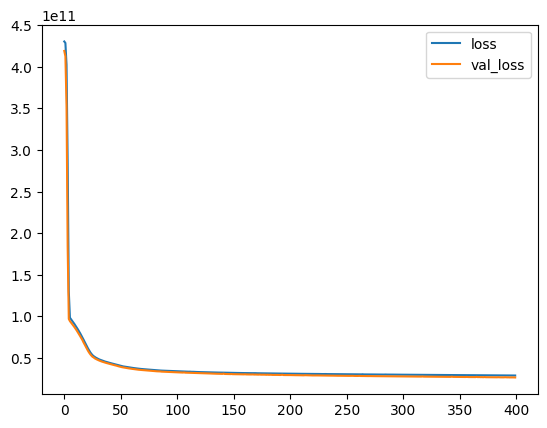

In [28]:
losses.plot()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [30]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 2ms/step


In [34]:
mean_squared_error(y_test,predictions)**0.5

163523.40547727654

In [35]:
mean_absolute_error(y_test,predictions)

101075.45998866705

In [36]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [37]:
explained_variance_score(y_test,predictions)

0.7983955256753049

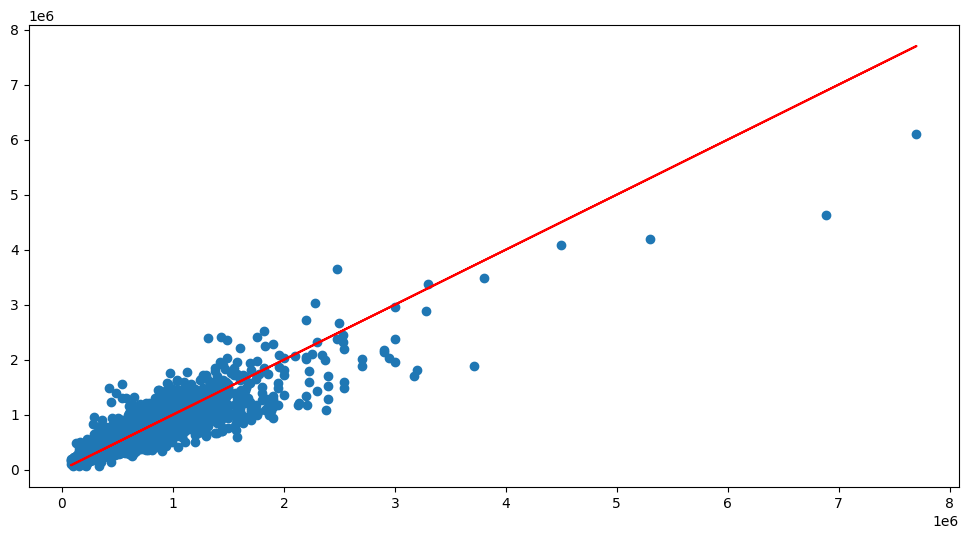

In [40]:
plt.figure(figsize =(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [42]:
single_house = df.drop('price',axis =1).iloc[0]

In [44]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [45]:
model.predict(single_house)

1/1 [==============================] - 0s 33ms/step


array([[287224.84]], dtype=float32)